In [112]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ładowanie Danych

In [113]:
def load_images_and_labels(data_dir, set_type):
    images = []
    labels = []

    # Ścieżki do folderów obrazów i etykiet
    images_path = os.path.join(data_dir, set_type, 'images')
    labels_path = os.path.join(data_dir, set_type, 'labels')

    # Iteracja przez wszystkie pliki w folderze z obrazami
    for filename in os.listdir(images_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(images_path, filename))
            images.append(img)

            label_filename = filename.replace('.jpg', '.txt').replace('.png', '.txt')
            with open(os.path.join(labels_path, label_filename), 'r') as f:
                label_data = f.readlines()

                # Zakładamy, że pierwsza wartość w pliku etykiety to informacja o skoliozie następne to informacje o położeniu anotacji jednak na ten moment nie potrafię ich odczytać
                if label_data:
                    first_value = int(label_data[0].strip().split()[0])
                    labels.append(first_value) 

    return images, labels

data_dir = 'Datasets/X-Ray/scoliosis'
train_images, train_labels = load_images_and_labels(data_dir, 'train')
valid_images, valid_labels = load_images_and_labels(data_dir, 'valid')
test_images, test_labels = load_images_and_labels(data_dir, 'test')

print(f'Train images: {len(train_images)}, Train labels: {len(train_labels)}')
print(f'Train shape {train_images[0].shape}')
print(f'Train labels content {train_labels}')
print(f'Valid images: {len(valid_images)}, Valid labels: {len(valid_labels)}')
print(f'Test images: {len(test_images)}, Test labels: {len(test_labels)}')

train_images = np.array(train_images).astype(np.float32)
train_labels = np.array(train_labels).astype(np.float32)
test_images = np.array(test_images).astype(np.float32)
test_labels = np.array(test_labels).astype(np.float32)
valid_images = np.array(valid_images).astype(np.float32)
valid_labels = np.array(valid_labels).astype(np.float32)

train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

Train images: 871, Train labels: 859
Train shape (120, 60, 3)
Train labels content [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

[[[0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.03529412 0.03529412 0.03529412]
  [0.         0.         0.        ]]

 [[0.01176471 0.01176471 0.01176471]
  [0.00392157 0.00392157 0.00392157]
  [0.05490196 0.05490196 0.05490196]
  ...
  [0.01568628 0.01568628 0.01568628]
  [0.07058824 0.07058824 0.07058824]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.07450981 0.07450981 0.07450981]
  ...
  [0.07058824 0.07058824 0.07058824]
  [0.11372549 0.11372549 0.11372549]
  [0.00392157 0.00392157 0.00392157]]

 ...

 [[0.05490196 0.05490196 0.05490196]
  [0.31764707 0.31764707 0.31764707]
  [0.5529412  0.5529412  0.5529412 ]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.06666667 0.06666667 0.06666667]


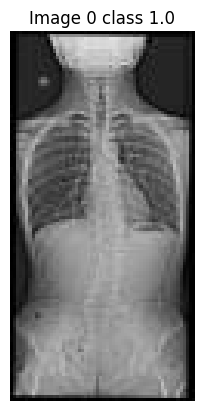

[[[0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.03529412 0.03529412 0.03529412]
  [0.         0.         0.        ]]

 [[0.01176471 0.01176471 0.01176471]
  [0.00392157 0.00392157 0.00392157]
  [0.05490196 0.05490196 0.05490196]
  ...
  [0.01568628 0.01568628 0.01568628]
  [0.07058824 0.07058824 0.07058824]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.07450981 0.07450981 0.07450981]
  ...
  [0.07058824 0.07058824 0.07058824]
  [0.11372549 0.11372549 0.11372549]
  [0.00392157 0.00392157 0.00392157]]

 ...

 [[0.05490196 0.05490196 0.05490196]
  [0.31764707 0.31764707 0.31764707]
  [0.5529412  0.5529412  0.5529412 ]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.06666667 0.06666667 0.06666667]


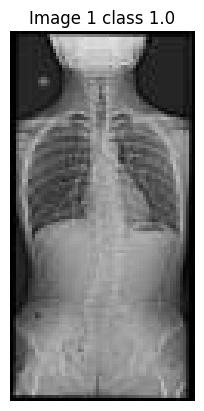

In [114]:
import cv2
for i in range(0, 2):
    print(train_images[0])
    plt.imshow(train_images[i])
    plt.title(f'Image {i} class {train_labels[i]}') 
    plt.axis('off')  
    plt.show()  

# Tworzenie Modelu

In [115]:
import tensorflow
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [142]:
model = Sequential([
    Conv2D(120, (3, 3), activation='relu', input_shape=(120, 60, 3)),  # Użycie 3 kanałów
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(48, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
# głupi fix na dziurawy dataset
test_images = test_images[:-3]
train_images = train_images[:-12]
history = model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 422ms/step - accuracy: 0.7693 - loss: 0.4325 - val_accuracy: 0.8800 - val_loss: 0.2232
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 499ms/step - accuracy: 0.8917 - loss: 0.2823 - val_accuracy: 0.9500 - val_loss: 0.2616
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 578ms/step - accuracy: 0.8808 - loss: 0.2778 - val_accuracy: 0.9100 - val_loss: 0.2048
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 488ms/step - accuracy: 0.8895 - loss: 0.2801 - val_accuracy: 0.9700 - val_loss: 0.1313
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 490ms/step - accuracy: 0.9269 - loss: 0.2012 - val_accuracy: 0.9100 - val_loss: 0.1662
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 551ms/step - accuracy: 0.9160 - loss: 0.1913 - val_accuracy: 0.9700 - val_loss: 0.1291
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 387ms/step - accuracy: 0.9413 - loss: 0.1717 - val_accuracy: 0.9500 - val_loss: 0.1696
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.9516 - loss: 0.1551 - val_accur

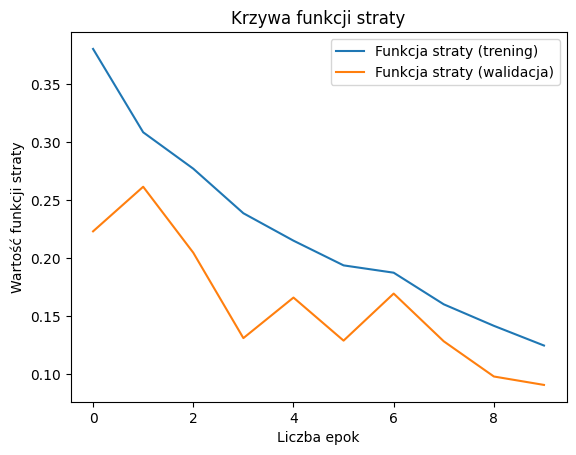

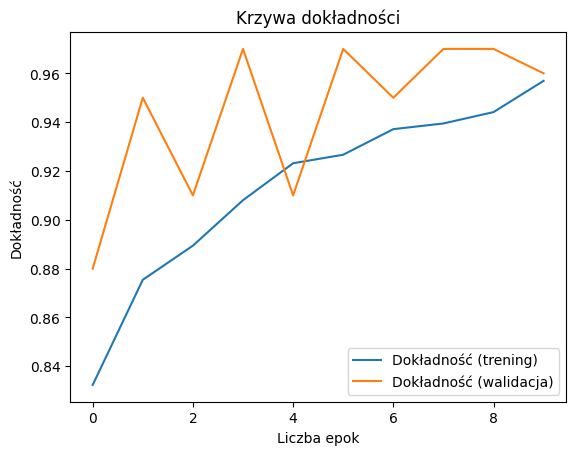

In [133]:
# Krzywye uczenia
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [135]:
print(test_images.shape)
pred_label = model.predict(test_images)

(98, 120, 60, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


In [120]:
pred_label

array([[0.90988666],
       [0.9411728 ],
       [0.96380264],
       [0.98996174],
       [0.9916811 ],
       [0.9968748 ],
       [0.9867027 ],
       [0.9146675 ],
       [0.90228456],
       [0.9938696 ],
       [0.8816719 ],
       [0.99202895],
       [0.8910605 ],
       [0.67998576],
       [0.83156866],
       [0.9842128 ],
       [0.9915112 ],
       [0.979816  ],
       [0.8709582 ],
       [0.9687405 ],
       [0.9910664 ],
       [0.9915185 ],
       [0.8394719 ],
       [0.9719902 ],
       [0.9992269 ],
       [0.99946433],
       [0.39120525],
       [0.99993163],
       [0.9942023 ],
       [0.9953357 ],
       [0.8849027 ],
       [1.        ],
       [0.99218214],
       [0.97684866],
       [0.07252732],
       [0.0337293 ],
       [0.03978156],
       [0.07436444],
       [0.11192267],
       [0.24414244],
       [0.13468914],
       [0.13468914],
       [0.06822775],
       [0.04104426],
       [0.24422425],
       [0.22891   ],
       [0.03543968],
       [0.020

In [121]:
pred_label = np.where(pred_label > 0.5, 1, 0)
pred_label

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

[30 53]


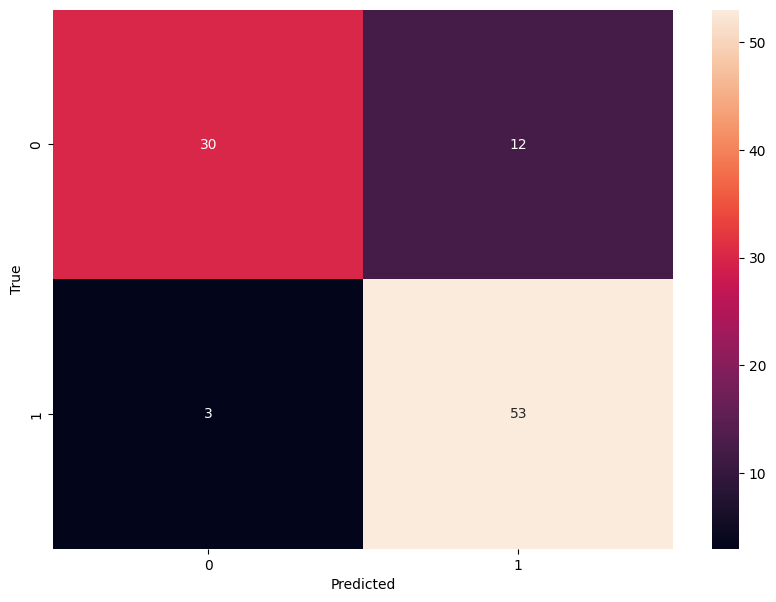

In [122]:
# Obliczenie confusion matrix

cm = confusion_matrix(pred_label, test_labels)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(2)], columns = [i for i in range(2)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [136]:
img = cv2.imread('Datasets/X-Ray/scoliosis/new_images/test.jpg')
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

(1, 120, 60, 3)

In [137]:
prot_lab = model.predict(my_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [138]:
prot_lab

array([[0.97594833]], dtype=float32)

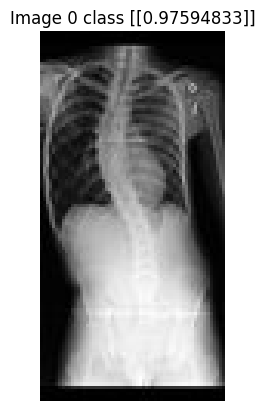

In [141]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  